In [118]:
import pandas as pd
import numpy as np 

def load_data():
    data = pd.read_csv('preprocessed_youtube_comments.csv')
    return data

data = load_data()
data.head(4)

,textDisplay,cleaned_text,Tokenization dan Case Folding,Filtering atau Stopword Removal,stemming_data
0,Kesal Sedih kecewa jadi satu!!!<br>Gimana pert...,Kesal Sedih kecewa jadi satuGimana pertandinga...,"['kesal', 'sedih', 'kecewa', 'jadi', 'satugima...","['kesal', 'sedih', 'kecewa', 'satugimana', 'pe...",kesal sedih kecewa satugimana tanding
1,Kesel ma wasit gua 😏,Kesel ma wasit gua,"['kesel', 'ma', 'wasit', 'gua']","['kesel', 'ma', 'wasit', 'gua']",kesel ma wasit gua
2,Saitama lagi.....saitama lagi....,Saitama lagisaitama lagi,"['saitama', 'lagisaitama', 'lagi']","['saitama', 'lagisaitama']",saitama lagisaitama
3,Wasit pendo,Wasit pendo,"['wasit', 'pendo']","['wasit', 'pendo']",wasit pendo


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12255 entries, 0 to 12254
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   textDisplay                      12254 non-null  object
 1   cleaned_text                     12253 non-null  object
 2   Tokenization dan Case Folding    12255 non-null  object
 3   Filtering atau Stopword Removal  12255 non-null  object
 4   stemming_data                    12253 non-null  object
dtypes: object(5)
memory usage: 478.8+ KB


In [136]:
df = pd.DataFrame(data['stemming_data'])
df.head(5)

,stemming_data
0,kesal sedih kecewa satugimana tanding
1,kesel ma wasit gua
2,saitama lagisaitama
3,wasit pendo
4,cuk nan


In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12255 entries, 0 to 12254
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stemming_data  12253 non-null  object
dtypes: object(1)
memory usage: 95.9+ KB


In [138]:
!pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wahyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wahyu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [141]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Memastikan bahwa tidak ada nilai NaN di kolom 'stemming_data'
df['stemming_data'] = df['stemming_data'].fillna('')  # Mengganti NaN dengan string kosong

# Inisialisasi VADER SentimentIntensityAnalyzer
data = SentimentIntensityAnalyzer()

# List untuk menyimpan label sentimen dan skor
labels = []
scores = []

# Analisis sentimen untuk setiap teks di kolom 'stemming_data'
for text in df['stemming_data']:
    sentiment_scores = data.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    scores.append(compound_score)

    if compound_score > 0:
        labels.append('Positif')
    elif compound_score < 0:
        labels.append('Negatif')
    else:
        labels.append('Netral')

# Menambahkan hasil sentimen ke DataFrame
df['sentiment'] = labels
df['sentiment_score'] = scores

# Pilih kolom yang diinginkan
data = ['stemming_data', 'sentiment_score', 'sentiment']
data = df[data]

# Menampilkan 1000 baris pertama dari data
data.head(1000)


,stemming_data,sentiment_score,sentiment
0,kesal sedih kecewa satugimana tanding,0.0000,Netral
1,kesel ma wasit gua,0.0000,Netral
2,saitama lagisaitama,0.0000,Netral
3,wasit pendo,0.0000,Netral
4,cuk nan,0.0000,Netral
...,...,...,...
995,menit bola selesai tanding,0.0000,Netral
996,hahaha bahrin g merinding emg klo main gbk lia...,0.5574,Positif
997,mental main lokal buruk witan menit tenang oper,0.0000,Netral
998,stuju,0.0000,Netral


C:\Users\wahyu\AppData\Local\Temp\ipykernel_15572\4155746653.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


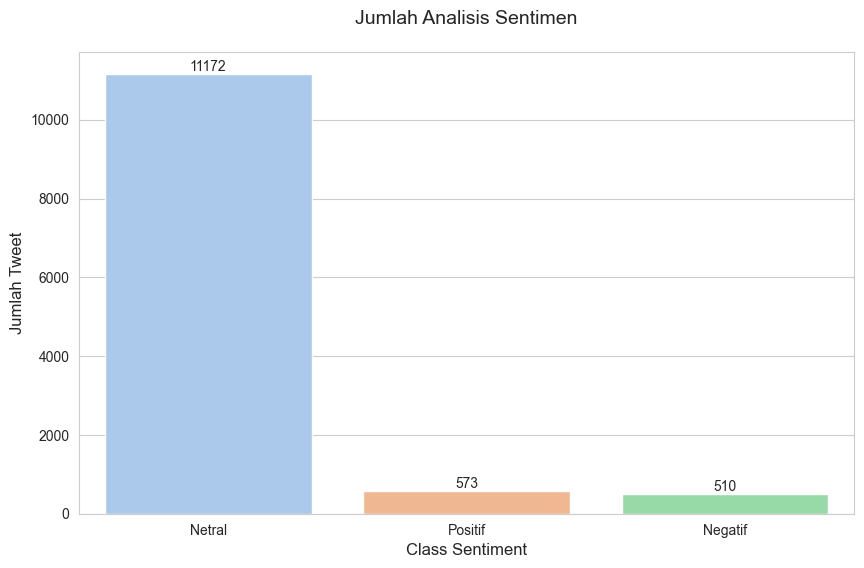

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()

In [144]:
data.to_csv('hasil_pelabelan.csv', encoding='utf8', index=False)